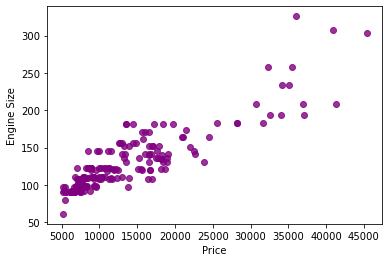

In [1]:
##https://towardsdatascience.com/correlation-when-pearsons-r-is-not-enough-aded72308635


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data
df = pd.read_csv('/Users/nbhadra/Documents/github_Nivedita/data/auto-cleaned.csv')

# Create the scatterplot
sns.regplot(data = df, x = 'price', y = 'engine-size', fit_reg = False, color = 'purple')

# Add labels for X and Y axes
plt.xlabel('Price')
plt.ylabel('Engine Size')
plt.show()

In [2]:
pwd

'/Users/nbhadra/Documents/github_Nivedita'

# 1. Pearson's r

In [3]:
# Calculate Pearson's r
stats.pearsonr(df['price'], df['engine-size'])

(0.8887784953105813, 1.2525079178143254e-66)

# 2. Spearman’s Rank Correlation Coefficient

In [4]:
# Calculate Spearman's rho
stats.spearmanr(df['price'], df['engine-size'])

SpearmanrResult(correlation=0.8733307703719501, pvalue=1.4412962530876853e-61)

# 3. Kendall’s Tau


In [5]:
# Calculate Kendall's Tau
tau_b = stats.kendalltau(df['price'], df['engine-size'], variant = 'b')
tau_c = stats.kendalltau(df['price'], df['engine-size'], variant = 'c')

print(f"Kendall's Tau (b) is: {tau_b}")
print(f"Kendall's Tau (c) is: {tau_c}")

Kendall's Tau (b) is: KendalltauResult(correlation=0.7014823398445257, pvalue=8.148712068837136e-46)
Kendall's Tau (c) is: KendalltauResult(correlation=0.700979066035846, pvalue=8.148712068837136e-46)


# 4. Point-Biserial


In [6]:
# Create the new column for the binary values
df['fuel-type-binary'] = df['fuel-type'].replace({'gas' : 0, 'diesel' : 1})

# Calculate Point-Biserial correlation coefficient
stats.pointbiserialr(df['price'], df['fuel-type-binary'])


PointbiserialrResult(correlation=0.11544021925980423, pvalue=0.10989215292636435)

# 5. Phi Coefficient


In [7]:
# Import necessary packages
import pandas as pd
import math

# Create a dataframe from two assumed binary variables of X and Y
df = pd.DataFrame({'X': [1, 1, 0, 0, 1, 0], 'Y': [1, 0, 1, 1, 0, 1]})

# Create a contingency table
table = pd.crosstab(df['X'], df['Y'])

# Extract the values from the table
n11 = table.iloc[0,0]
n10 = table.iloc[0,1]
n01 = table.iloc[1,0]
n00 = table.iloc[1,1]

# Calculate the phi coefficient
coef = (n11*n00 - n10*n01) / (math.sqrt((n11+n10)*(n11+n01)*(n00+n10)*(n00+n01)))

print(f"Phi Coefficient: {coef}")

Phi Coefficient: -0.7071067811865476


In [8]:
# Import necessary packages
from sklearn.metrics import matthews_corrcoef

# Create two assumed binary variables
X = [1, 1, 0, 0, 1, 0]
Y = [1, 0, 1, 1, 0, 1]

# Calculate MCC
mcc = matthews_corrcoef(X, Y)
print(f"Matthews Correlation Coefficient: {mcc}")

Matthews Correlation Coefficient: -0.7071067811865476


# 6. Cramer’s V


In [9]:
# Import necessary libraries
import pandas as pd
import math

# Create a dataframe
df = pd.DataFrame({'X': ['A', 'A', 'B', 'B', 'A', 'B'], 'Y': ['W', 'X', 'W', 'W', 'X', 'W']})

# Create a contingency table
table = pd.crosstab(df['X'], df['Y'])

#Calculate the chi-squared statistic and the p-value
chi2, p, dof, expected = stats.chi2_contingency(table)

#Calculate Cramer's V
V = math.sqrt(chi2 / (table.values.sum()*min(table.shape[0]-1, table.shape[1]-1)))

print(f"Cramer's V: {V}")

Cramer's V: 0.3535533905932738


# 7. Polychoric Correlation


# 8. Partial Correlation


In [10]:
# Import necessary packages
import pandas as pd

# Create a dataframe of X, Y and Z variables
data = {
    'X': [1, 1, 9, 0, 1, 8, 10, 7, 10, 0, 1, 9, 0, 6, 2, 6, 9, 0, 9, 7], 
    'Y': [8, 2, 4, 3, 0, 1, 6, 0, 5, 6, 10, 3, 2, 7, 4, 5, 6, 0, 5, 10],
    'Z': [0, 2, 1, 1, 2, 2, 7, 7, 2, 6, 4, 4, 7, 7, 6, 6, 1, 6, 4, 7]
}

df = pd.DataFrame(data)

# Create a correlation matrix
corr_matrix = df.corr()

x_y_correlation = corr_matrix.loc['X', 'Y']
x_z_correlation = corr_matrix.loc['X', 'Z']
y_z_correlation = corr_matrix.loc['Y', 'Z']

# Calculate the Partial Correlation between X and Y, while controlling for Z
partial_correlation_xy_z = (x_y_correlation - (x_z_correlation * y_z_correlation)) / ((1 - (x_z_correlation ** 2)) * (1 - (y_z_correlation ** 2))) ** 0.5

print(f"Partial Correlation (between X and Y, while controlling for Z): {partial_correlation_xy_z}")

Partial Correlation (between X and Y, while controlling for Z): 0.14040597205107264


In [11]:
# Import necessary packages
import pandas as pd
import pingouin as pg

# Create a dataframe of X, Y and Z variables
data = {
    'X': [1, 1, 9, 0, 1, 8, 10, 7, 10, 0, 1, 9, 0, 6, 2, 6, 9, 0, 9, 7], 
    'Y': [8, 2, 4, 3, 0, 1, 6, 0, 5, 6, 10, 3, 2, 7, 4, 5, 6, 0, 5, 10],
    'Z': [0, 2, 1, 1, 2, 2, 7, 7, 2, 6, 4, 4, 7, 7, 6, 6, 1, 6, 4, 7]
}
df = pd.DataFrame(data)

# Calculate the Partial Correlation between X and Y, while controlling for Z
partial_correlation_xy_z = pg.partial_corr(data = df, x='X', y='Y', covar='Z', method = 'pearson')

print(partial_correlation_xy_z)

          n         r          CI95%     p-val
pearson  20  0.140406  [-0.34, 0.56]  0.566429


# 9. Tetrachoric Correlation Coefficient
